# Linear Regression from scratch

### Step 1: Initialize Parameters

In [5]:
import numpy as np

w = np.random.randn()
b = np.random.randn()

### Step 2: Hypothesis Function

In [8]:
def predict(x, w, b):
    return w * x + b

### Step 3: Loss Function (MSE)

In [13]:
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


### Step 4: Gradient Descent

In [14]:
def gradient_descent(x, y, w, b, learning_rate, epochs):
    n = len(y)
    for i in range(epochs):
        y_pred = predict(x, w, b)
        
        dw = -(2/n) * np.sum(x * (y - y_pred))
        db = -(2/n) * np.sum(y - y_pred)
      
        w -= learning_rate * dw
        b -= learning_rate * db
       
        loss = compute_loss(y, y_pred)
        if i % 100 == 0:
            print(f'Epoch {i}, Loss: {loss}, w: {w}, b: {b}')
    return w, b

# Linear Regression Practical Implementation

In [16]:
#from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### URL to the dataset

In [55]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
data_url

'http://lib.stat.cmu.edu/datasets/boston'

### Read the raw data

In [42]:
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

### Combine data from consecutive rows, Extract target values

In [46]:
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

target = raw_df.values[1::2, 2]

### Optionally, convert to a DataFrame for easier manipulation and visualization

In [50]:
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", 
    "PTRATIO", "B", "LSTAT", "MEDV"
]
dataset = pd.DataFrame(np.column_stack([data, target]), columns=columns)

In [51]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [52]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [53]:
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


### Independent features and dependant features

In [56]:
X = dataset.drop(columns=["MEDV"]) 
y = dataset["MEDV"] 

In [57]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

### Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 42)

In [59]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


### Standarizing the dataset

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [62]:
X_train = scaler.fit_transform(X_train)

In [63]:
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [64]:
X_test = scaler.transform(X_test)

In [65]:
X_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

In [66]:
from sklearn.linear_model import LinearRegression

### Cross validation

In [67]:
from sklearn.model_selection import cross_val_score

In [75]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [76]:
mse = cross_val_score (regression, X_train,y_train,scoring = 'neg_mean_squared_error', cv = 5)

In [77]:
mse

array([-24.85792467, -32.34889563, -29.41534458, -18.46226827,
       -24.80445401])

In [74]:
np.mean(mse)

-25.977777430926302

### Prediction

In [78]:
reg_predict = regression.predict(X_test)

In [79]:
reg_predict

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [80]:
import seaborn as sns

C:\Users\Fahan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


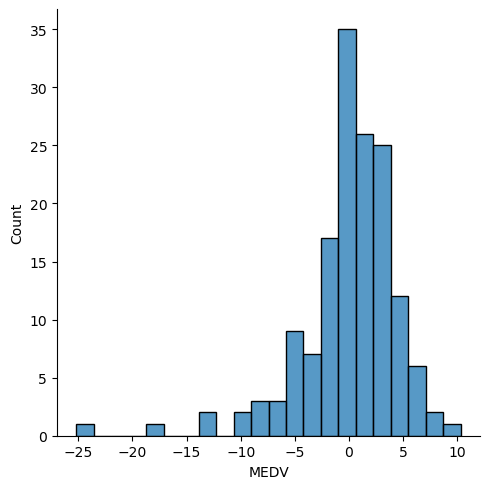

In [81]:
sns.displot(reg_predict - y_test)

C:\Users\Fahan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


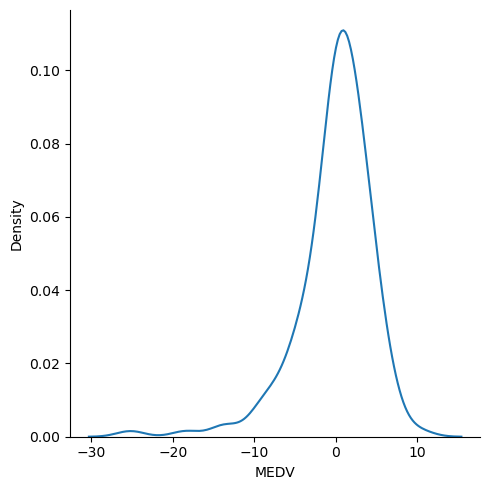

In [83]:
sns.displot(reg_predict - y_test, kind = 'kde')

In [84]:
from sklearn.metrics import r2_score

In [85]:
score = r2_score (reg_predict, y_test)

In [86]:
score

0.6693702691495591

# Now for sample dataset

In [87]:
import numpy as np
import matplotlib.pyplot as plt

### Sample dataset

In [88]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

### Step-by-Step Implementation

In [89]:
import numpy as np

### Step 1: Initialize Parameters

In [90]:
w = np.random.randn()
b = np.random.randn()

### Step 2: Hypothesis Function

In [91]:
def predict(x, w, b):
    return w * x + b

### Step 3: Loss Function (MSE)

In [92]:
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

### Step 4: Gradient Descent

In [93]:
def gradient_descent(x, y, w, b, learning_rate, epochs):
    n = len(y)
    for i in range(epochs):
        y_pred = predict(x, w, b)

        dw = -(2/n) * np.sum(x * (y - y_pred))
        db = -(2/n) * np.sum(y - y_pred)

        w -= learning_rate * dw
        b -= learning_rate * db

        loss = compute_loss(y, y_pred)
        if i % 100 == 0:
            print(f'Epoch {i}, Loss: {loss}, w: {w}, b: {b}')
    return w, b

In [94]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

### Hyperparameters

In [95]:
learning_rate = 0.000001
epochs = 25

### Train the model

In [96]:
w, b = gradient_descent(x, y, w, b, learning_rate, epochs)

Epoch 0, Loss: 35.469531798521636, w: 0.09782311702908707, b: 0.3932166475698169


### Make prediction

In [97]:
y_pred = predict(x, w, b)
y_pred

array([0.4922422 , 0.59101279, 0.68978337, 0.78855396, 0.88732454])

### Plot the results

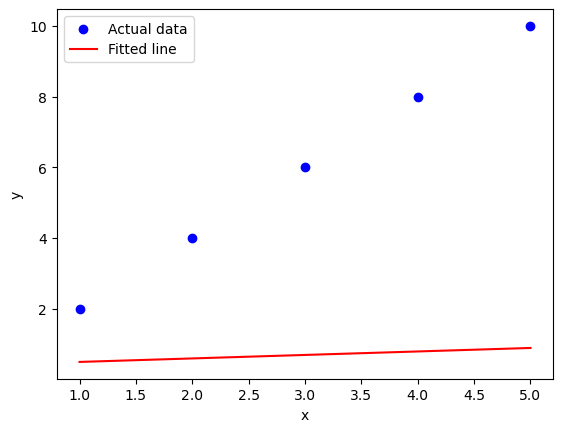

In [98]:
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, y_pred, color='red', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()